In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:

# Lee el archivo CSV
data_df = pd.read_csv("../docs/Filtered_Resultados_Saber_11.csv")

# Asigna los nombres de las columnas
column_names = ['PERIODO', 'COLE_DEPTO_UBICACION', 'COLE_CALENDARIO',
       'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET',
       'FAMI_TIENELAVADORA', 'PUNT_GLOBAL', 'COLE_AREA_UBICACION',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE',
       'FAMI_EDUCACIONPADRE']
data_df.columns = column_names

# Elimina la primera fila del DataFrame
#data_df = data_df.drop(index=0)

# Mover la columna "PUNT_GLOBAL" al final
punt_global_col = data_df.pop('PUNT_GLOBAL')
data_df['PUNT_GLOBAL'] = punt_global_col

# Muestra las primeras filas del DataFrame con los cambios aplicados
data_df.head()



,PERIODO,COLE_DEPTO_UBICACION,COLE_CALENDARIO,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,COLE_AREA_UBICACION,FAMI_ESTRATOVIVIENDA,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,PUNT_GLOBAL
0,20112,META,A,No,No,No,No,URBANO,Estrato 1,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,NaN
1,20142,META,A,Si,Si,Si,Si,URBANO,Estrato 3,Tres,Secundaria (Bachillerato) completa,Primaria incompleta,332.0
2,20142,META,A,No,Si,Si,Si,URBANO,Estrato 3,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,257.0
3,20194,META,A,No,Si,No,Si,URBANO,Estrato 2,Tres,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,251.0
4,20194,META,A,No,Si,No,Si,URBANO,Estrato 2,Tres,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,251.0


In [37]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats
from sklearn.linear_model import Lasso

In [38]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

## Tarea 3: Exploracion de datos


3. Tarea 3: Exploracion de datos

>3.1 Analisis variables categóricos/cualitativas

>3.2 Búsqueda de relaciones con la variable objetivo

>3.3 Datos atipicos

>3.4 Búsqueda de relaciones entre las variables de entrada



### 3.1 Análisis datos categoricos


Automovil

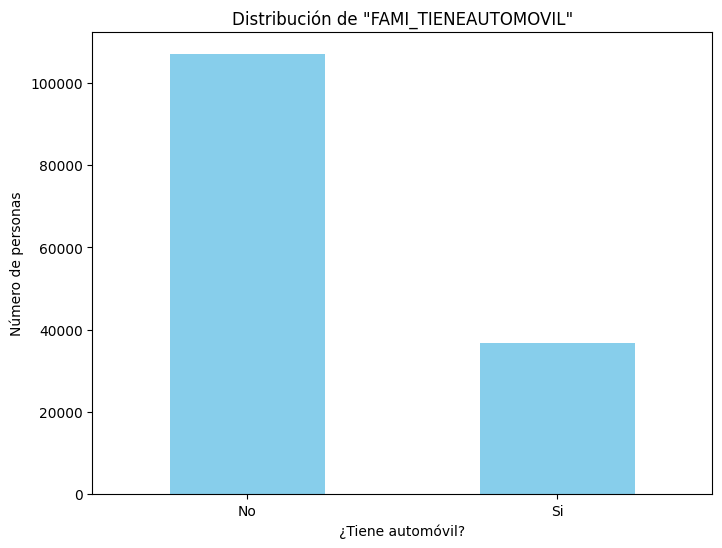

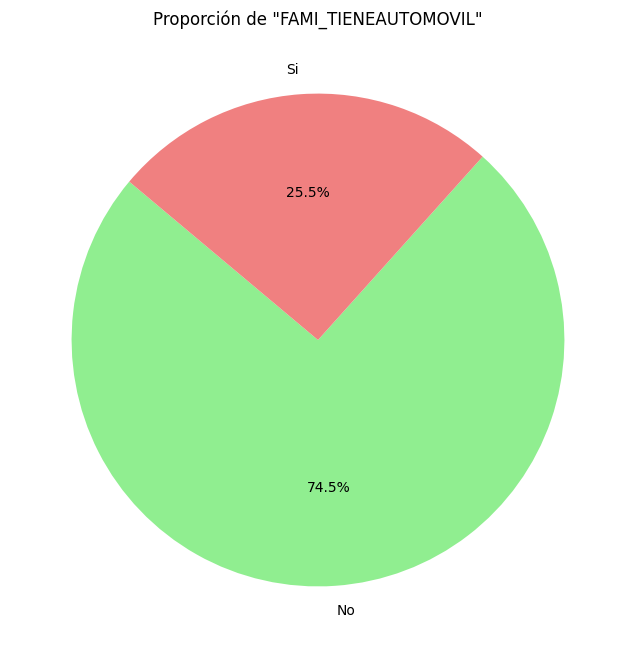

In [39]:
# Calcular el recuento de cada categoría
counts = data_df['FAMI_TIENEAUTOMOVIL'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de "FAMI_TIENEAUTOMOVIL"')
plt.xlabel('¿Tiene automóvil?')
plt.ylabel('Número de personas')
plt.xticks(rotation=0)
plt.show()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proporción de "FAMI_TIENEAUTOMOVIL"')
plt.ylabel('')
plt.show()

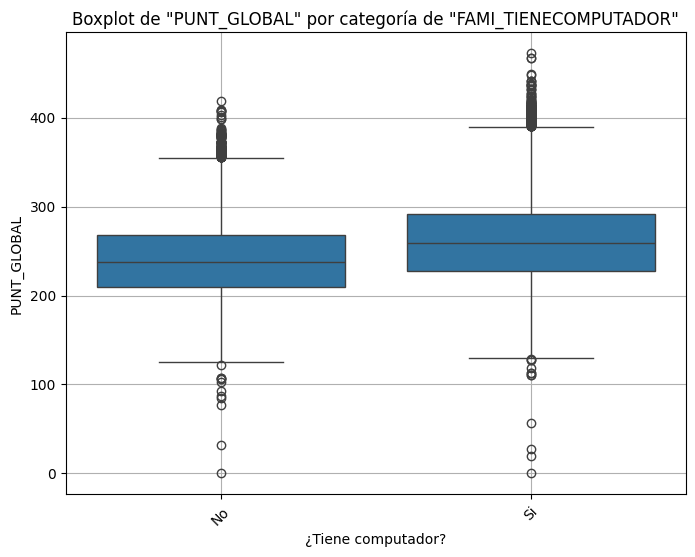

  ¿Tiene automóvil?  Frecuencia
0                No      106957
1                Si       36673


In [40]:

# Crea un boxplot de 'PUNT_GLOBAL' para cada categoría de 'FAMI_TIENECOMPUTADOR'
plt.figure(figsize=(8, 6))
sns.boxplot(x='FAMI_TIENECOMPUTADOR', y='PUNT_GLOBAL', data=data_df)
plt.title('Boxplot de "PUNT_GLOBAL" por categoría de "FAMI_TIENECOMPUTADOR"')
plt.xlabel('¿Tiene computador?')
plt.ylabel('PUNT_GLOBAL')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Tabla de frecuencia de la variable 'FAMI_TIENEAUTOMOVIL'
fami_auto_frequency_table = data_df['FAMI_TIENEAUTOMOVIL'].value_counts().reset_index()
fami_auto_frequency_table.columns = ['¿Tiene automóvil?', 'Frecuencia']
print(fami_auto_frequency_table)


Computador

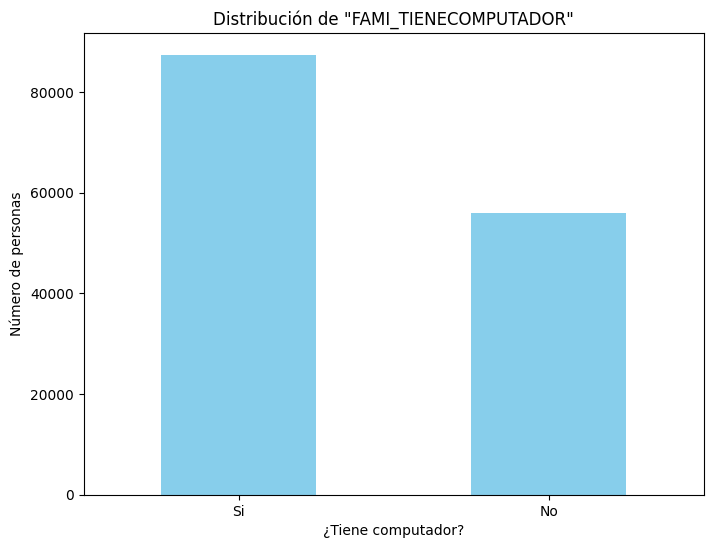

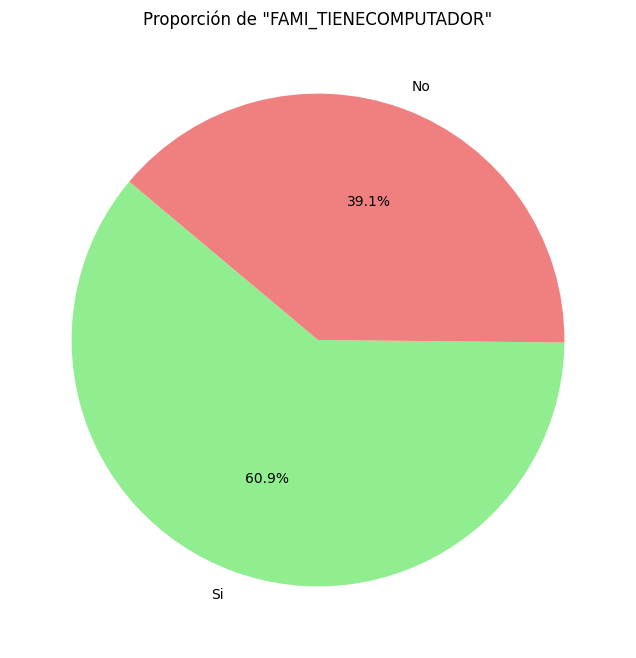

In [41]:
# Calcular el recuento de cada categoría
counts_fami_computador = data_df['FAMI_TIENECOMPUTADOR'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
counts_fami_computador.plot(kind='bar', color='skyblue')
plt.title('Distribución de "FAMI_TIENECOMPUTADOR"')
plt.xlabel('¿Tiene computador?')
plt.ylabel('Número de personas')
plt.xticks(rotation=0)
plt.show()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
counts_fami_computador.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proporción de "FAMI_TIENECOMPUTADOR"')
plt.ylabel('')
plt.show()


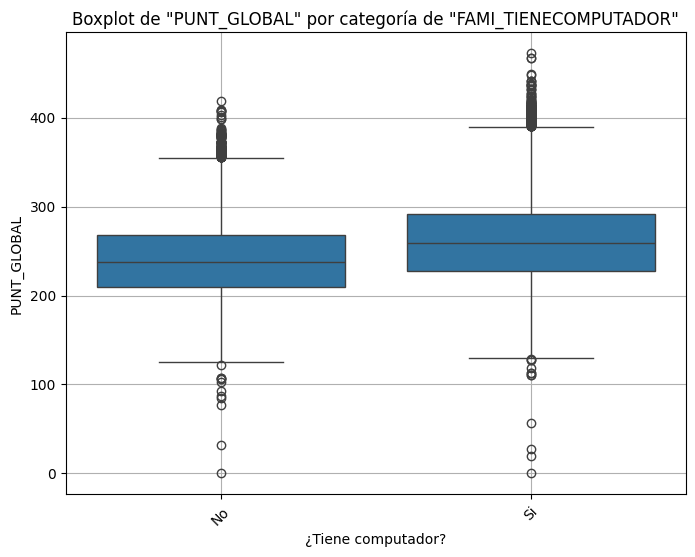

  ¿Tiene automóvil?  Frecuencia
0                No      106957
1                Si       36673


In [42]:
# Crea un boxplot de 'PUNT_GLOBAL' para cada categoría de 'FAMI_TIENECOMPUTADOR'
plt.figure(figsize=(8, 6))
sns.boxplot(x='FAMI_TIENECOMPUTADOR', y='PUNT_GLOBAL', data=data_df)
plt.title('Boxplot de "PUNT_GLOBAL" por categoría de "FAMI_TIENECOMPUTADOR"')
plt.xlabel('¿Tiene computador?')
plt.ylabel('PUNT_GLOBAL')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Tabla de frecuencia de la variable 'FAMI_TIENEAUTOMOVIL'
fami_auto_frequency_table = data_df['FAMI_TIENEAUTOMOVIL'].value_counts().reset_index()
fami_auto_frequency_table.columns = ['¿Tiene automóvil?', 'Frecuencia']
print(fami_auto_frequency_table)


Internet

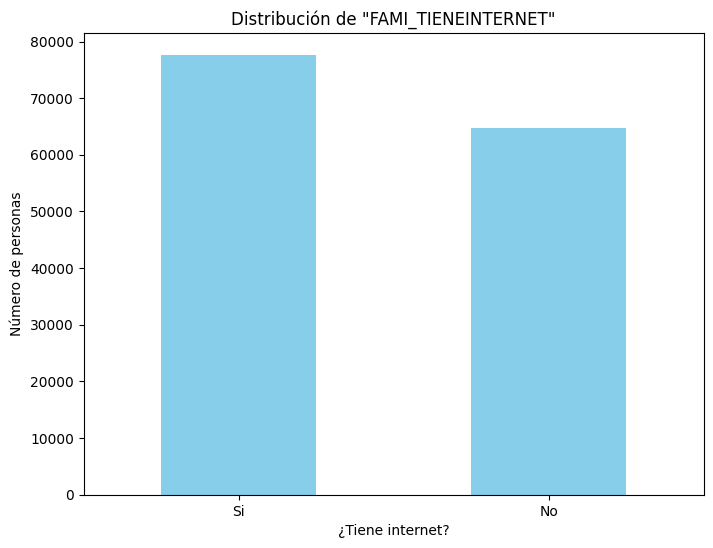

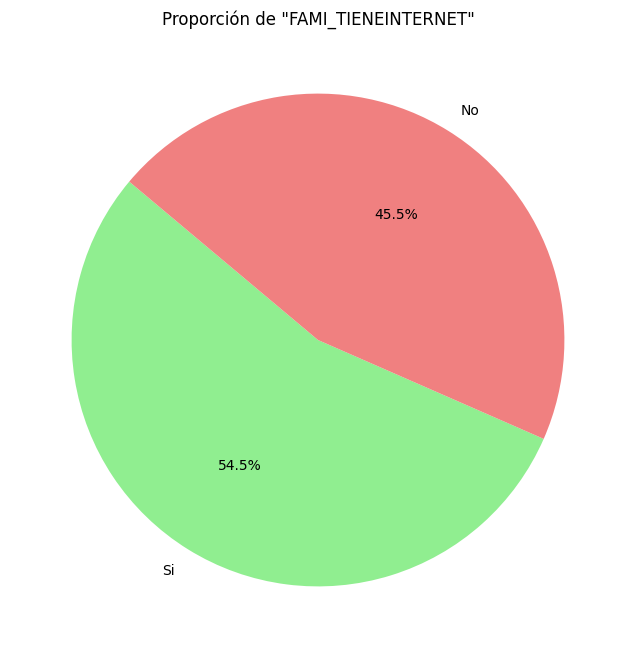

In [43]:
# Calcular el recuento de cada categoría
counts_fami_internet = data_df['FAMI_TIENEINTERNET'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
counts_fami_internet.plot(kind='bar', color='skyblue')
plt.title('Distribución de "FAMI_TIENEINTERNET"')
plt.xlabel('¿Tiene internet?')
plt.ylabel('Número de personas')
plt.xticks(rotation=0)
plt.show()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
counts_fami_internet.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proporción de "FAMI_TIENEINTERNET"')
plt.ylabel('')
plt.show()


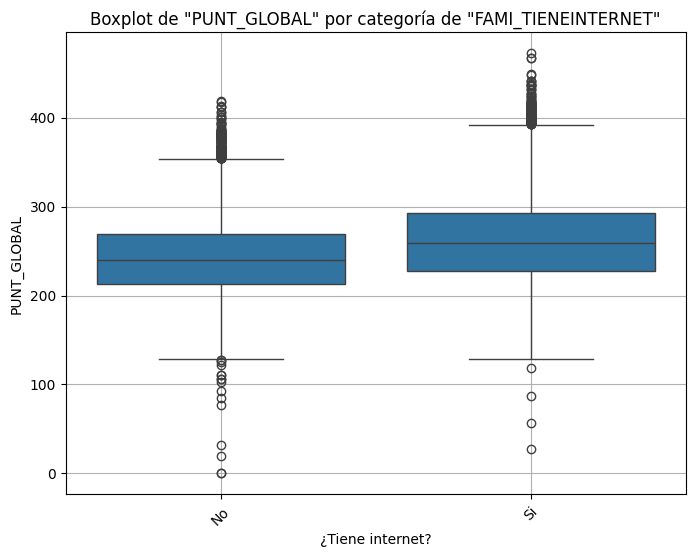

  ¿Tiene internet?  Frecuencia
0               Si       77670
1               No       64742


In [44]:
# Crea un boxplot de 'PUNT_GLOBAL' para cada categoría de 'FAMI_TIENEINTERNET'
plt.figure(figsize=(8, 6))
sns.boxplot(x='FAMI_TIENEINTERNET', y='PUNT_GLOBAL', data=data_df)
plt.title('Boxplot de "PUNT_GLOBAL" por categoría de "FAMI_TIENEINTERNET"')
plt.xlabel('¿Tiene internet?')
plt.ylabel('PUNT_GLOBAL')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Tabla de frecuencia de la variable 'FAMI_TIENEINTERNET'
fami_internet_frequency_table = data_df['FAMI_TIENEINTERNET'].value_counts().reset_index()
fami_internet_frequency_table.columns = ['¿Tiene internet?', 'Frecuencia']
print(fami_internet_frequency_table)


Lavadora

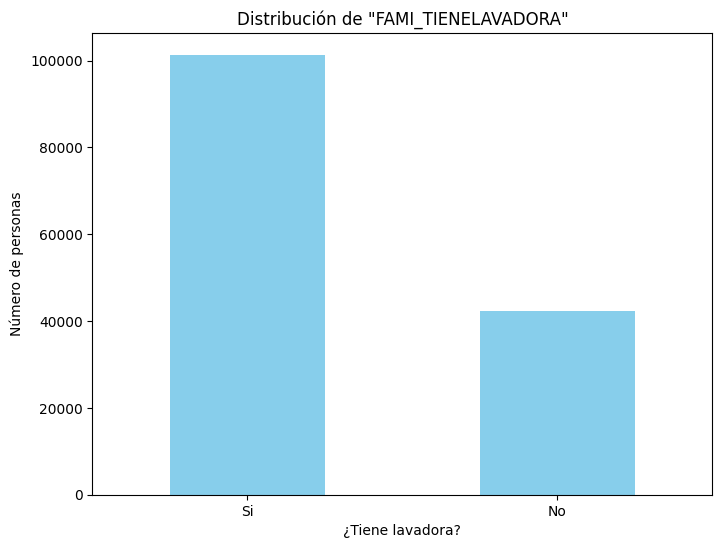

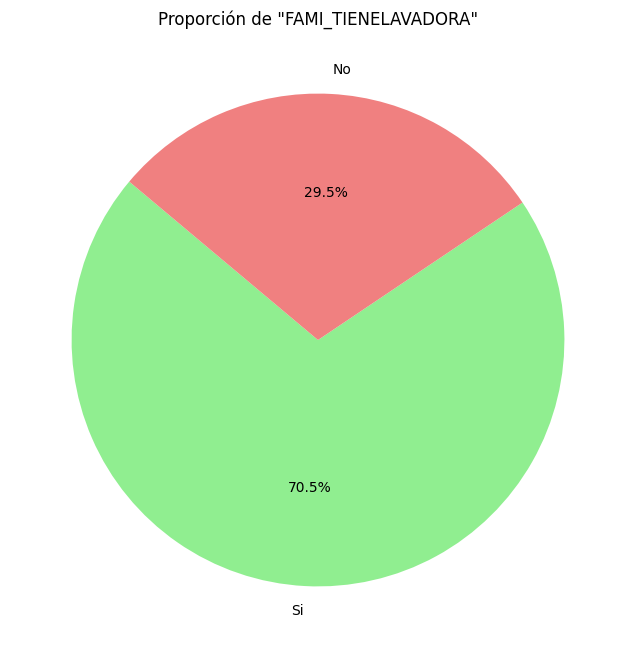

In [45]:
# Calcular el recuento de cada categoría
counts_fami_lavadora = data_df['FAMI_TIENELAVADORA'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
counts_fami_lavadora.plot(kind='bar', color='skyblue')
plt.title('Distribución de "FAMI_TIENELAVADORA"')
plt.xlabel('¿Tiene lavadora?')
plt.ylabel('Número de personas')
plt.xticks(rotation=0)
plt.show()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
counts_fami_lavadora.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proporción de "FAMI_TIENELAVADORA"')
plt.ylabel('')
plt.show()


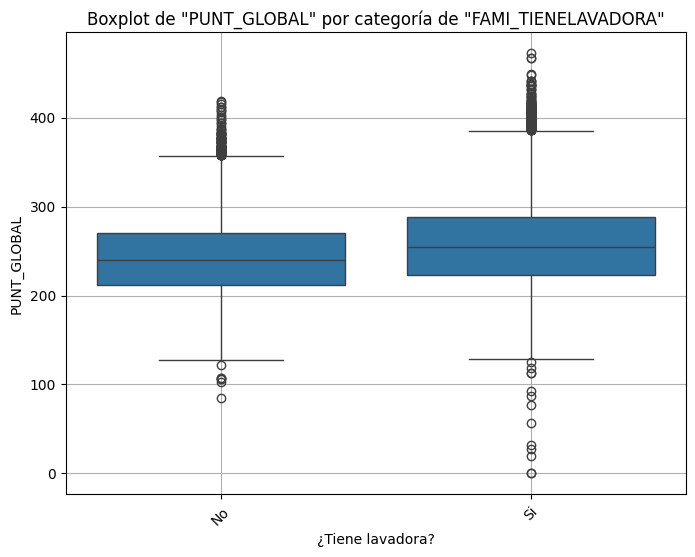

  ¿Tiene lavadora?  Frecuencia
0               Si      101369
1               No       42355


In [46]:
# Crea un boxplot de 'PUNT_GLOBAL' para cada categoría de 'FAMI_TIENELAVADORA'
plt.figure(figsize=(8, 6))
sns.boxplot(x='FAMI_TIENELAVADORA', y='PUNT_GLOBAL', data=data_df)
plt.title('Boxplot de "PUNT_GLOBAL" por categoría de "FAMI_TIENELAVADORA"')
plt.xlabel('¿Tiene lavadora?')
plt.ylabel('PUNT_GLOBAL')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Tabla de frecuencia de la variable 'FAMI_TIENELAVADORA'
fami_lavadora_frequency_table = data_df['FAMI_TIENELAVADORA'].value_counts().reset_index()
fami_lavadora_frequency_table.columns = ['¿Tiene lavadora?', 'Frecuencia']
print(fami_lavadora_frequency_table)


Ubicación

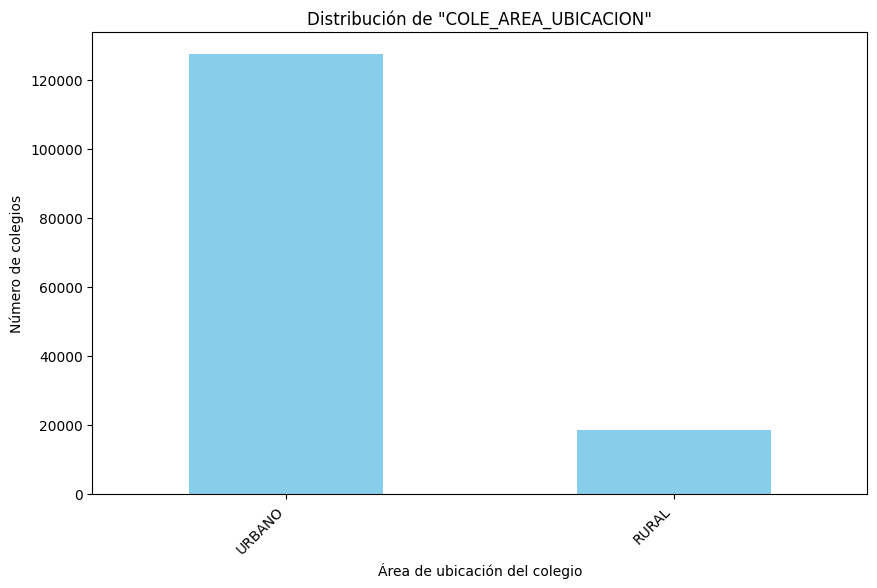

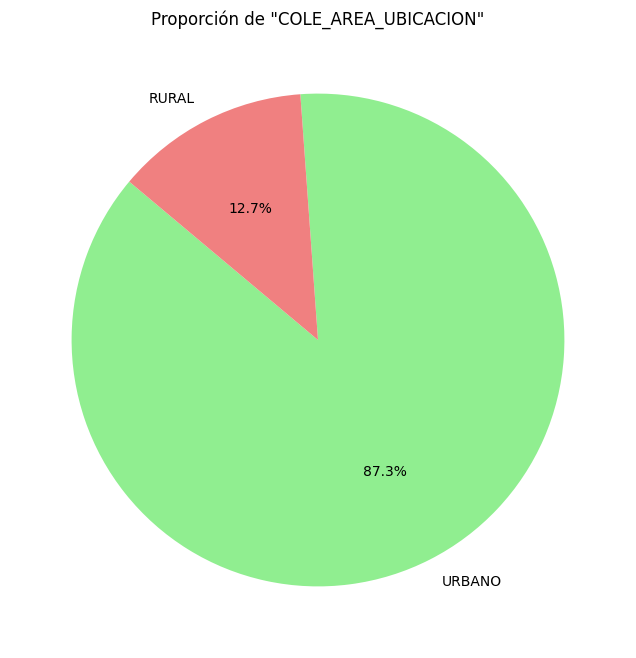

In [47]:
# Calcular el recuento de cada categoría
counts_cole_area = data_df['COLE_AREA_UBICACION'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
counts_cole_area.plot(kind='bar', color='skyblue')
plt.title('Distribución de "COLE_AREA_UBICACION"')
plt.xlabel('Área de ubicación del colegio')
plt.ylabel('Número de colegios')
plt.xticks(rotation=45, ha='right')
plt.show()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
counts_cole_area.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proporción de "COLE_AREA_UBICACION"')
plt.ylabel('')
plt.show()


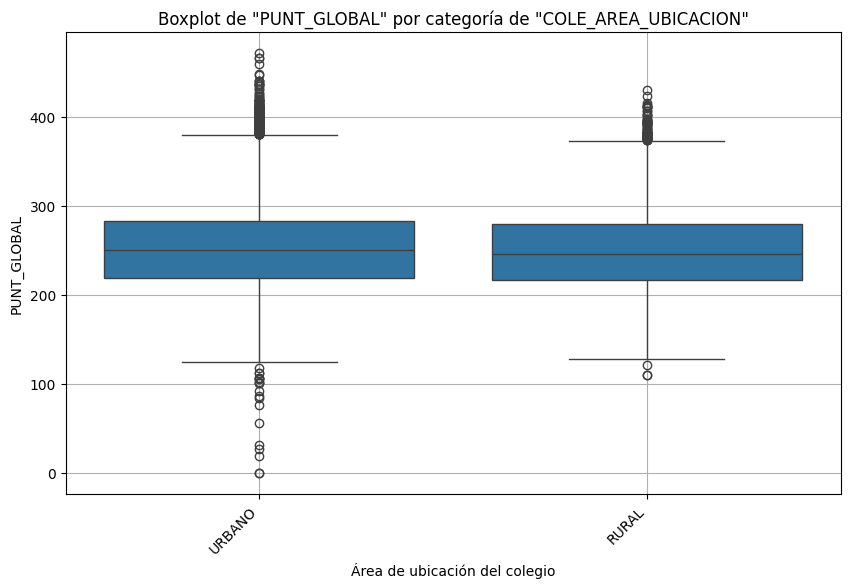

  Área de ubicación del colegio  Frecuencia
0                        URBANO      127394
1                         RURAL       18612


In [48]:
# Crea un boxplot de 'PUNT_GLOBAL' para cada categoría de 'COLE_AREA_UBICACION'
plt.figure(figsize=(10, 6))
sns.boxplot(x='COLE_AREA_UBICACION', y='PUNT_GLOBAL', data=data_df)
plt.title('Boxplot de "PUNT_GLOBAL" por categoría de "COLE_AREA_UBICACION"')
plt.xlabel('Área de ubicación del colegio')
plt.ylabel('PUNT_GLOBAL')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Tabla de frecuencia de la variable 'COLE_AREA_UBICACION'
cole_area_frequency_table = data_df['COLE_AREA_UBICACION'].value_counts().reset_index()
cole_area_frequency_table.columns = ['Área de ubicación del colegio', 'Frecuencia']
print(cole_area_frequency_table)


Año

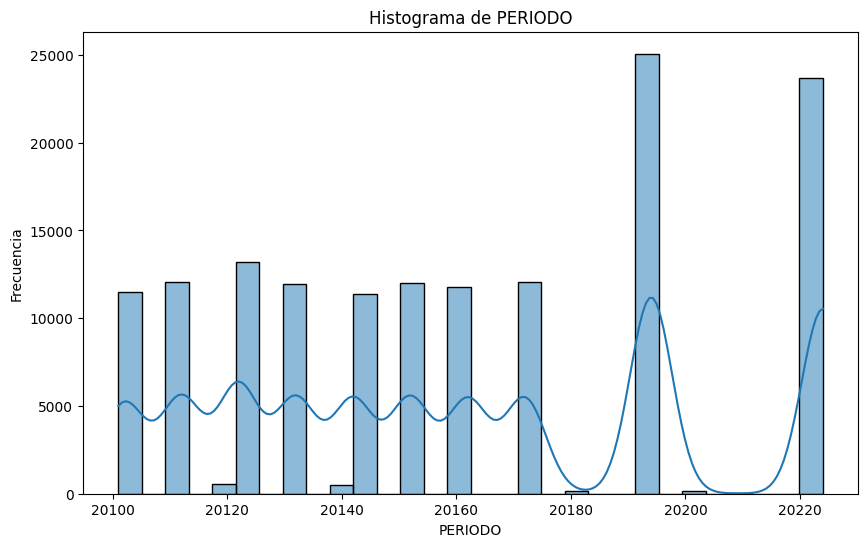

In [49]:

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data_df['PERIODO'], kde=True, bins=30)
plt.title('Histograma de PERIODO')
plt.xlabel('PERIODO')
plt.ylabel('Frecuencia')
plt.show()


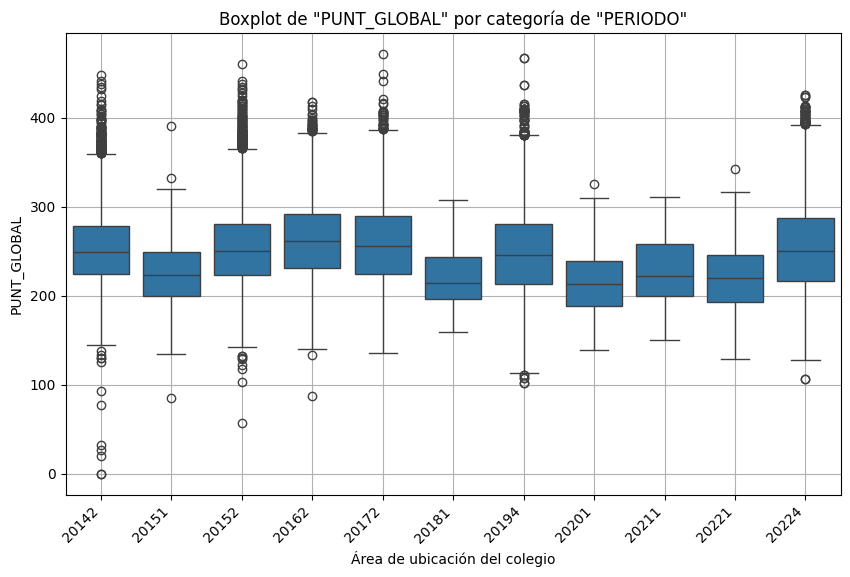

In [50]:
df_periodo = data_df[['PERIODO', 'PUNT_GLOBAL']]
#Eliminar los na de la columna periodo
df_periodo = df_periodo.dropna()
# Crea un boxplot de 'PUNT_GLOBAL' para cada categoría de 'COLE_AREA_UBICACION'
plt.figure(figsize=(10, 6))
sns.boxplot(x='PERIODO', y='PUNT_GLOBAL', data=df_periodo)
plt.title('Boxplot de "PUNT_GLOBAL" por categoría de "PERIODO"')
plt.xlabel('Área de ubicación del colegio')
plt.ylabel('PUNT_GLOBAL')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [51]:
df_periodo[df_periodo['PERIODO'] == 20101].describe()

,PERIODO,PUNT_GLOBAL
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [52]:
#Cantidad de NaN para la variable objtivo PUNT_GLOBAL por periodo
periodos = data_df['PERIODO'].unique()
periodos = sorted(periodos)

for periodo in periodos:
    print(f'Periodo: {periodo}')
    print(data_df[data_df['PERIODO'] == periodo]['PUNT_GLOBAL'].isna().sum())
    print('')

#Cantidad de NaN para la variable objtivo PUNT_GLOBAL
print('Total de NaN para la variable objetivo PUNT_GLOBAL')
print(data_df['PUNT_GLOBAL'].isna().sum())

Periodo: 20101
283

Periodo: 20102
11199

Periodo: 20111
457

Periodo: 20112
11619

Periodo: 20121
550

Periodo: 20122
13211

Periodo: 20131
528

Periodo: 20132
11442

Periodo: 20141
474

Periodo: 20142
0

Periodo: 20151
0

Periodo: 20152
0

Periodo: 20162
0

Periodo: 20172
0

Periodo: 20181
0

Periodo: 20194
0

Periodo: 20201
0

Periodo: 20211
0

Periodo: 20221
0

Periodo: 20224
0

Total de NaN para la variable objetivo PUNT_GLOBAL
49763


Estudio Madre

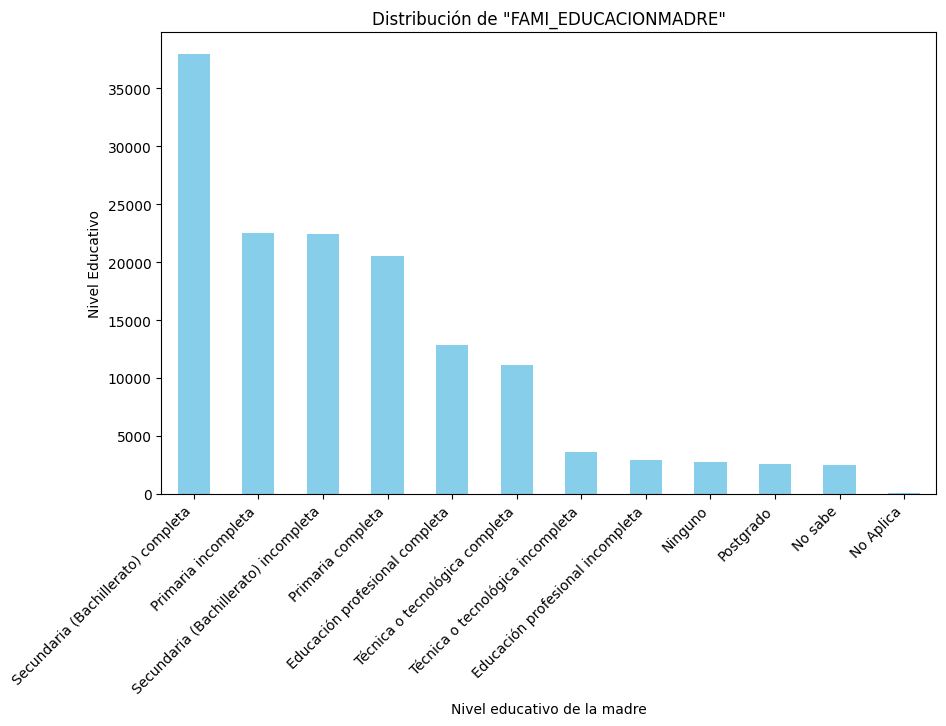

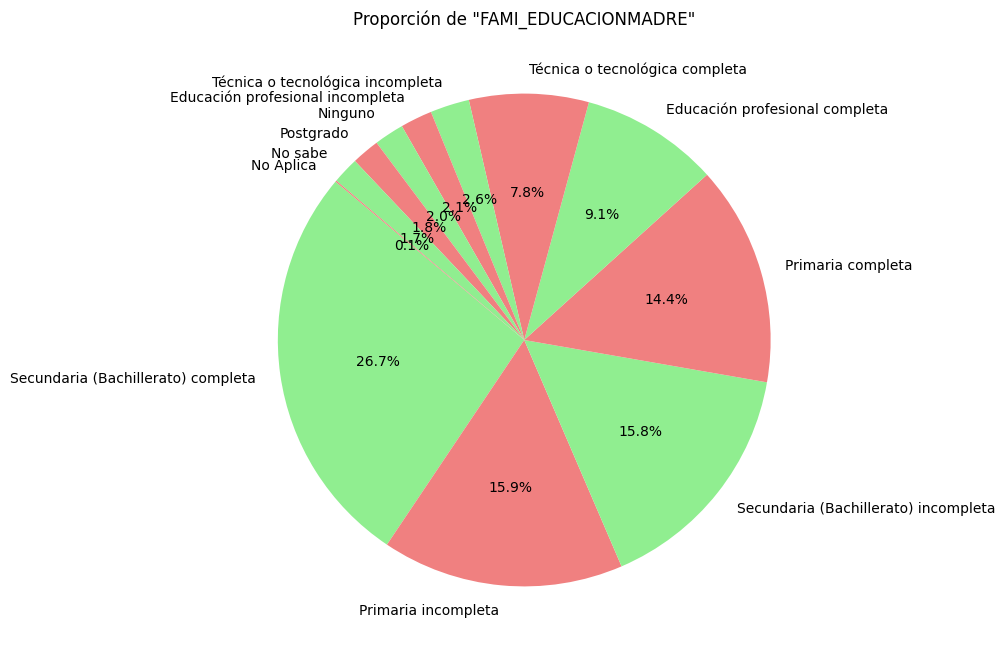

In [53]:
# Calcular el recuento de cada categoría
counts_cole_area = data_df['FAMI_EDUCACIONMADRE'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
counts_cole_area.plot(kind='bar', color='skyblue')
plt.title('Distribución de "FAMI_EDUCACIONMADRE"')
plt.xlabel('Nivel educativo de la madre')
plt.ylabel('Nivel Educativo')
plt.xticks(rotation=45, ha='right')
plt.show()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
counts_cole_area.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proporción de "FAMI_EDUCACIONMADRE"')
plt.ylabel('')
plt.show()


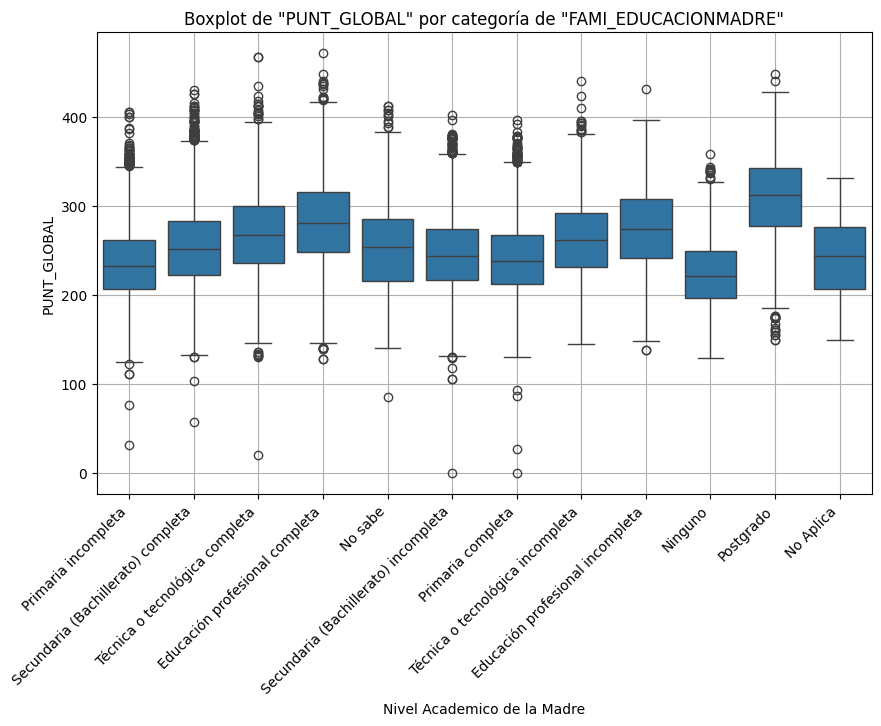

             Nivel Academico de la Madre  Frecuencia
0     Secundaria (Bachillerato) completa       37970
1                    Primaria incompleta       22559
2   Secundaria (Bachillerato) incompleta       22446
3                      Primaria completa       20540
4         Educación profesional completa       12896
5         Técnica o tecnológica completa       11148
6       Técnica o tecnológica incompleta        3653
7       Educación profesional incompleta        2973
8                                Ninguno        2782
9                              Postgrado        2601
10                               No sabe        2485
11                             No Aplica         117


In [54]:
# Crea un boxplot de 'PUNT_GLOBAL' para cada categoría de 'FAMI_EDUCACIONMADRE'
plt.figure(figsize=(10, 6))
sns.boxplot(x='FAMI_EDUCACIONMADRE', y='PUNT_GLOBAL', data=data_df)
plt.title('Boxplot de "PUNT_GLOBAL" por categoría de "FAMI_EDUCACIONMADRE"')
plt.xlabel('Nivel Academico de la Madre')
plt.ylabel('PUNT_GLOBAL')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Tabla de frecuencia de la variable 'FAMI_EDUCACIONMADRE'
cole_area_frequency_table = data_df['FAMI_EDUCACIONMADRE'].value_counts().reset_index()
cole_area_frequency_table.columns = ['Nivel Academico de la Madre', 'Frecuencia']
print(cole_area_frequency_table)

Educación Padre

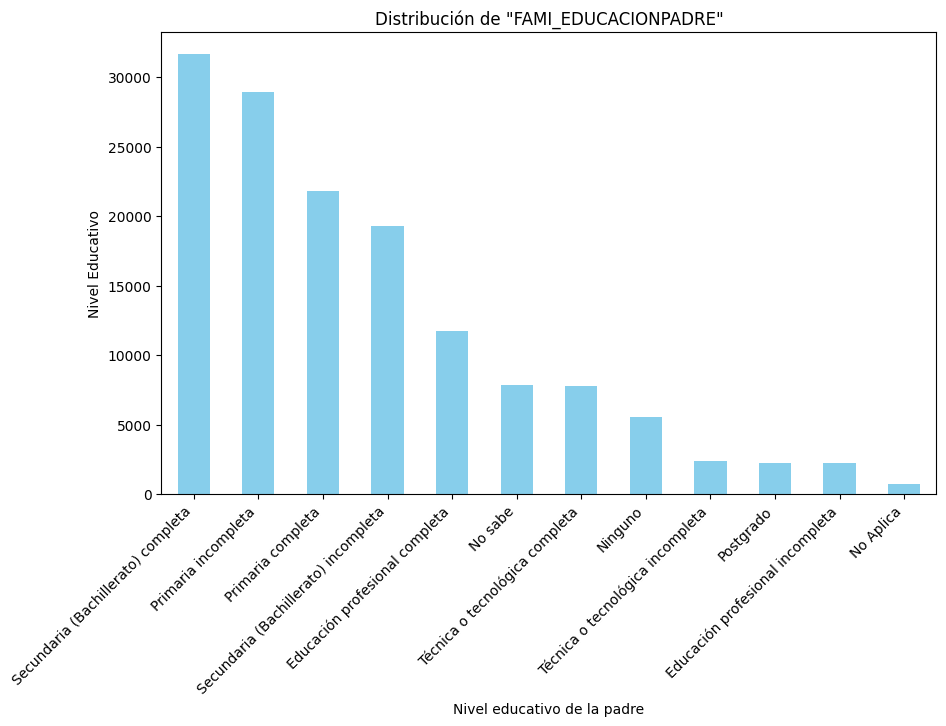

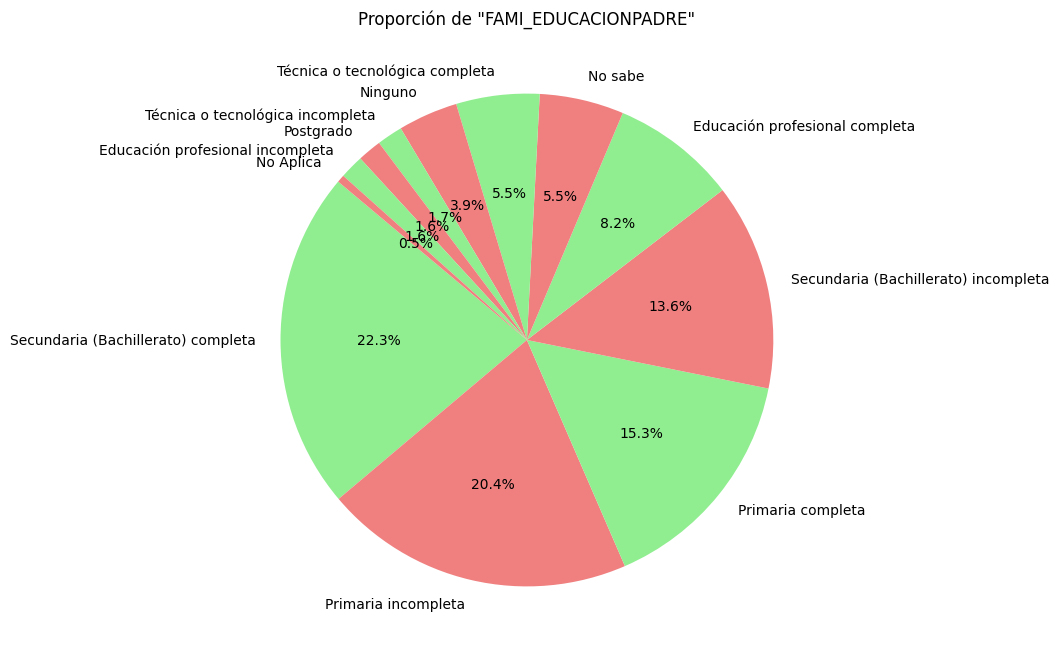

In [55]:
# Calcular el recuento de cada categoría
counts_cole_area = data_df['FAMI_EDUCACIONPADRE'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
counts_cole_area.plot(kind='bar', color='skyblue')
plt.title('Distribución de "FAMI_EDUCACIONPADRE"')
plt.xlabel('Nivel educativo de la padre')
plt.ylabel('Nivel Educativo')
plt.xticks(rotation=45, ha='right')
plt.show()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
counts_cole_area.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proporción de "FAMI_EDUCACIONPADRE"')
plt.ylabel('')
plt.show()

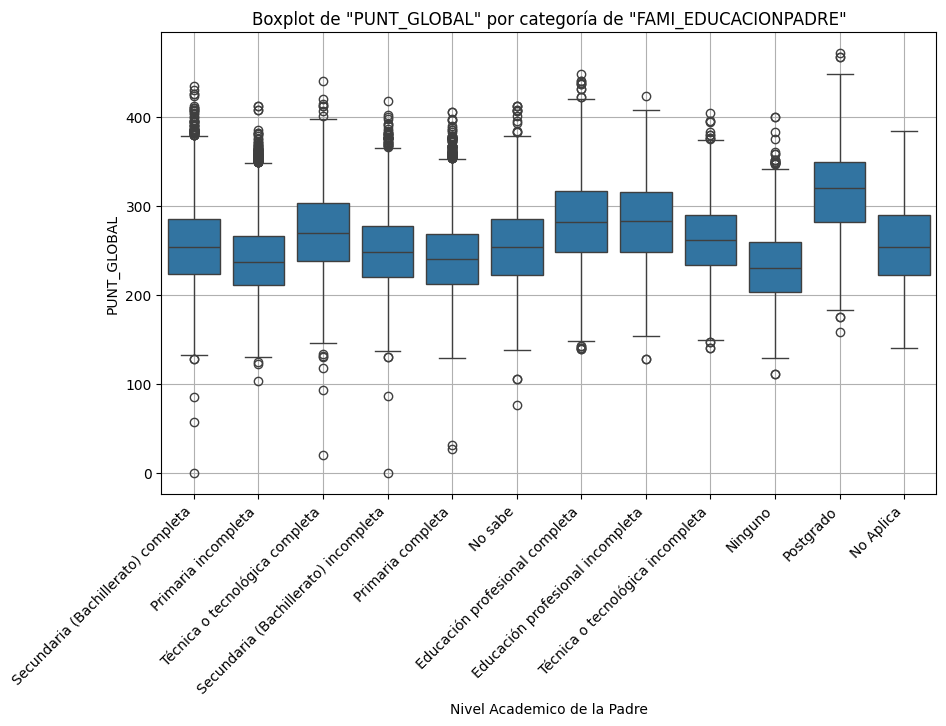

             Nivel Academico de la Padre  Frecuencia
0     Secundaria (Bachillerato) completa       31663
1                    Primaria incompleta       28937
2                      Primaria completa       21801
3   Secundaria (Bachillerato) incompleta       19285
4         Educación profesional completa       11706
5                                No sabe        7864
6         Técnica o tecnológica completa        7770
7                                Ninguno        5579
8       Técnica o tecnológica incompleta        2399
9                              Postgrado        2236
10      Educación profesional incompleta        2235
11                             No Aplica         708


In [56]:
# Crea un boxplot de 'PUNT_GLOBAL' para cada categoría de 'FAMI_EDUCACIONMADRE'
plt.figure(figsize=(10, 6))
sns.boxplot(x='FAMI_EDUCACIONPADRE', y='PUNT_GLOBAL', data=data_df)
plt.title('Boxplot de "PUNT_GLOBAL" por categoría de "FAMI_EDUCACIONPADRE"')
plt.xlabel('Nivel Academico de la Padre')
plt.ylabel('PUNT_GLOBAL')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Tabla de frecuencia de la variable 'FAMI_EDUCACIONPADRE'
cole_area_frequency_table = data_df['FAMI_EDUCACIONPADRE'].value_counts().reset_index()
cole_area_frequency_table.columns = ['Nivel Academico de la Padre', 'Frecuencia']
print(cole_area_frequency_table)

In [57]:
# Coincidencia de nivel educativo entre padres y madres
temp = data_df['FAMI_EDUCACIONMADRE'] == data_df['FAMI_EDUCACIONPADRE']
temp = temp.value_counts()
print(temp)

False    86590
True     59416
Name: count, dtype: int64


Estrato

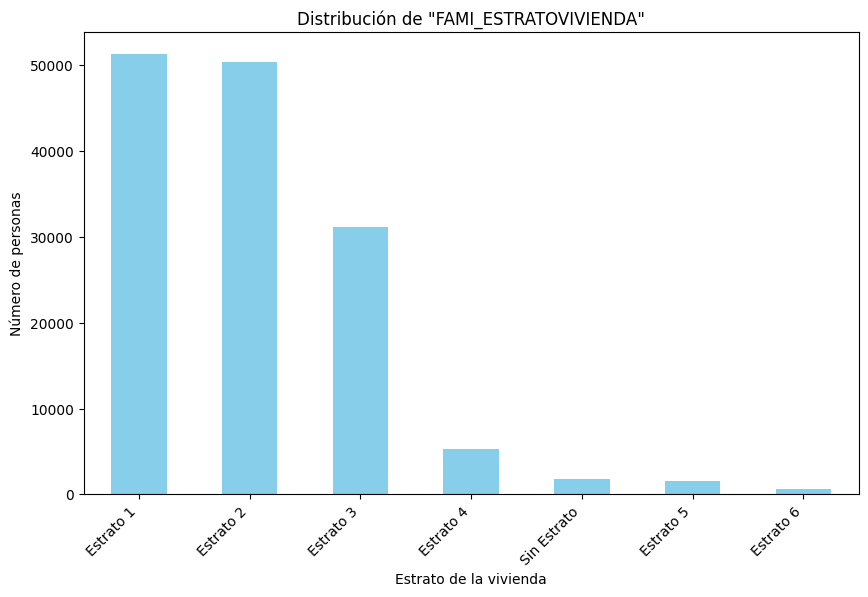

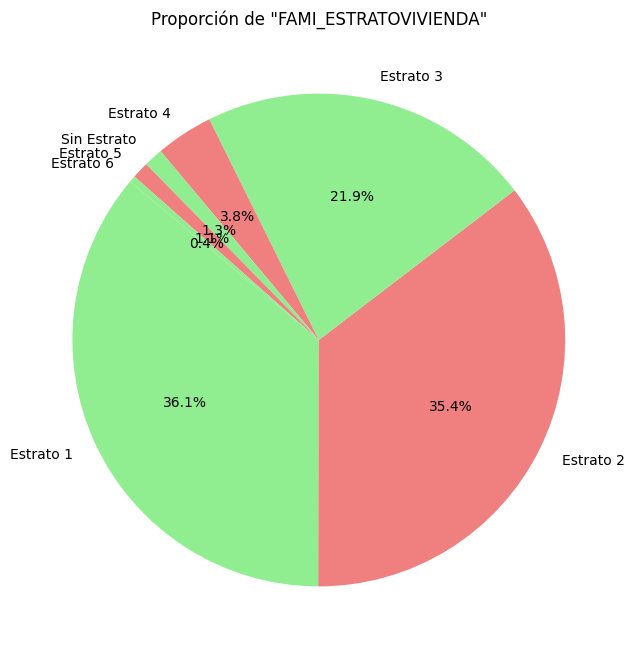

In [58]:
# Calcular el recuento de cada categoría
counts_cole_area = data_df['FAMI_ESTRATOVIVIENDA'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
counts_cole_area.plot(kind='bar', color='skyblue')
plt.title('Distribución de "FAMI_ESTRATOVIVIENDA"')
plt.xlabel('Estrato de la vivienda')
plt.ylabel('Número de personas')
plt.xticks(rotation=45, ha='right')
plt.show()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
counts_cole_area.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proporción de "FAMI_ESTRATOVIVIENDA"')
plt.ylabel('')
plt.show()

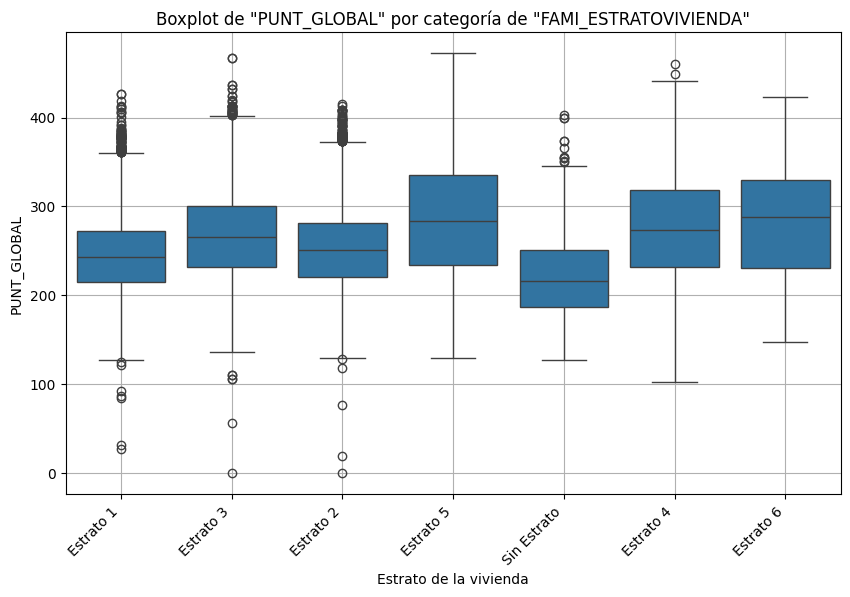

  Estrato de la vivienda  Frecuencia
0              Estrato 1       51289
1              Estrato 2       50371
2              Estrato 3       31201
3              Estrato 4        5353
4            Sin Estrato        1791
5              Estrato 5        1563
6              Estrato 6         615


In [59]:
# Crea un boxplot de 'PUNT_GLOBAL' para cada categoría de 'FAMI_ESTRATOVIVIENDA'
plt.figure(figsize=(10, 6))
sns.boxplot(x='FAMI_ESTRATOVIVIENDA', y='PUNT_GLOBAL', data=data_df)
plt.title('Boxplot de "PUNT_GLOBAL" por categoría de "FAMI_ESTRATOVIVIENDA"')
plt.xlabel('Estrato de la vivienda')
plt.ylabel('PUNT_GLOBAL')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Tabla de frecuencia de la variable 'FAMI_EDUCACIONPADRE'
cole_area_frequency_table = data_df['FAMI_ESTRATOVIVIENDA'].value_counts().reset_index()
cole_area_frequency_table.columns = ['Estrato de la vivienda', 'Frecuencia']
print(cole_area_frequency_table)

Numero de cuartos

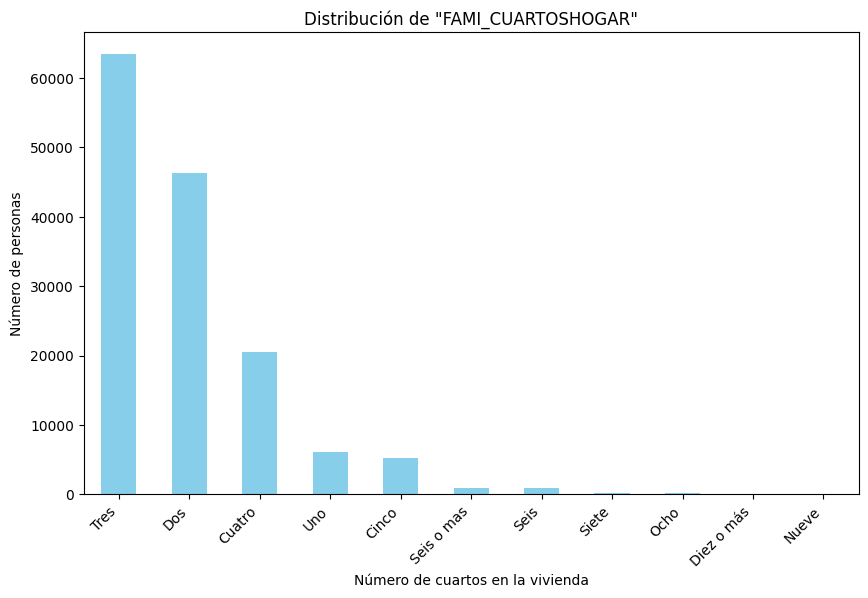

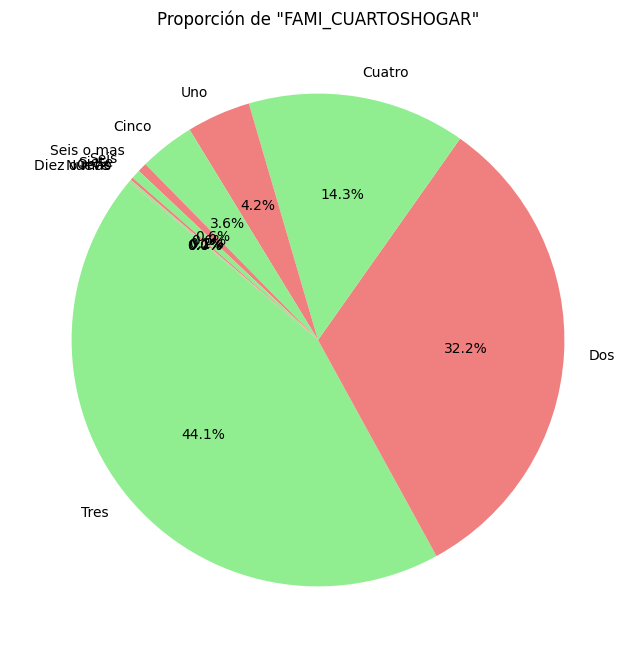

In [60]:
# Calcular el recuento de cada categoría
counts_cole_area = data_df['FAMI_CUARTOSHOGAR'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
counts_cole_area.plot(kind='bar', color='skyblue')
plt.title('Distribución de "FAMI_CUARTOSHOGAR"')
plt.xlabel('Número de cuartos en la vivienda')
plt.ylabel('Número de personas')
plt.xticks(rotation=45, ha='right')
plt.show()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
counts_cole_area.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proporción de "FAMI_CUARTOSHOGAR"')
plt.ylabel('')
plt.show()

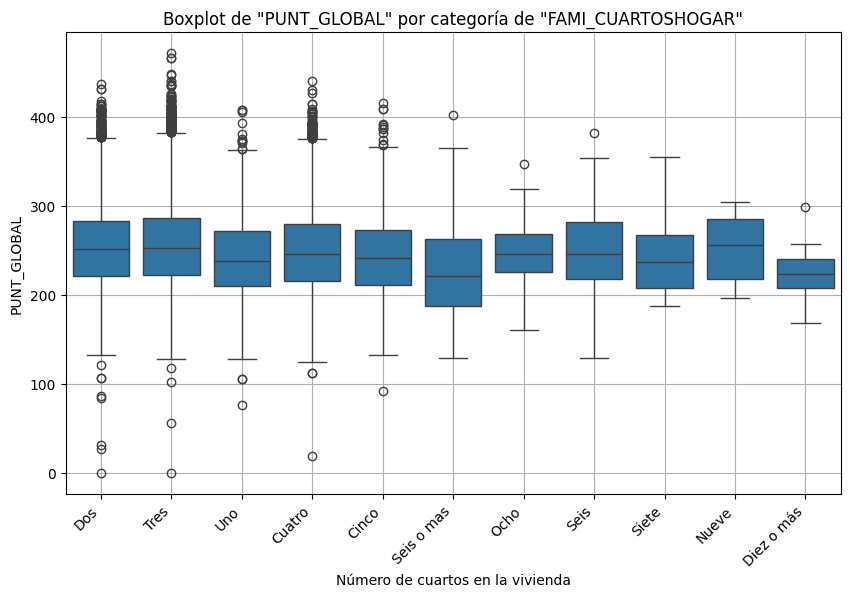

   Número de cuartos en la vivienda  Frecuencia
0                              Tres       63372
1                               Dos       46330
2                            Cuatro       20562
3                               Uno        6033
4                             Cinco        5209
5                        Seis o mas         884
6                              Seis         854
7                             Siete         253
8                              Ocho         138
9                        Diez o más          52
10                            Nueve          29


In [61]:
# Crea un boxplot de 'PUNT_GLOBAL' para cada categoría de 'FAMI_CUARTOSHOGAR'
plt.figure(figsize=(10, 6))
sns.boxplot(x='FAMI_CUARTOSHOGAR', y='PUNT_GLOBAL', data=data_df)
plt.title('Boxplot de "PUNT_GLOBAL" por categoría de "FAMI_CUARTOSHOGAR"')
plt.xlabel('Número de cuartos en la vivienda')
plt.ylabel('PUNT_GLOBAL')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Tabla de frecuencia de la variable 'FAMI_EDUCACIONPADRE'
cole_area_frequency_table = data_df['FAMI_CUARTOSHOGAR'].value_counts().reset_index()
cole_area_frequency_table.columns = ['Número de cuartos en la vivienda', 'Frecuencia']
print(cole_area_frequency_table)

### 3.2 Búsqueda de relaciones con la variable objetivo

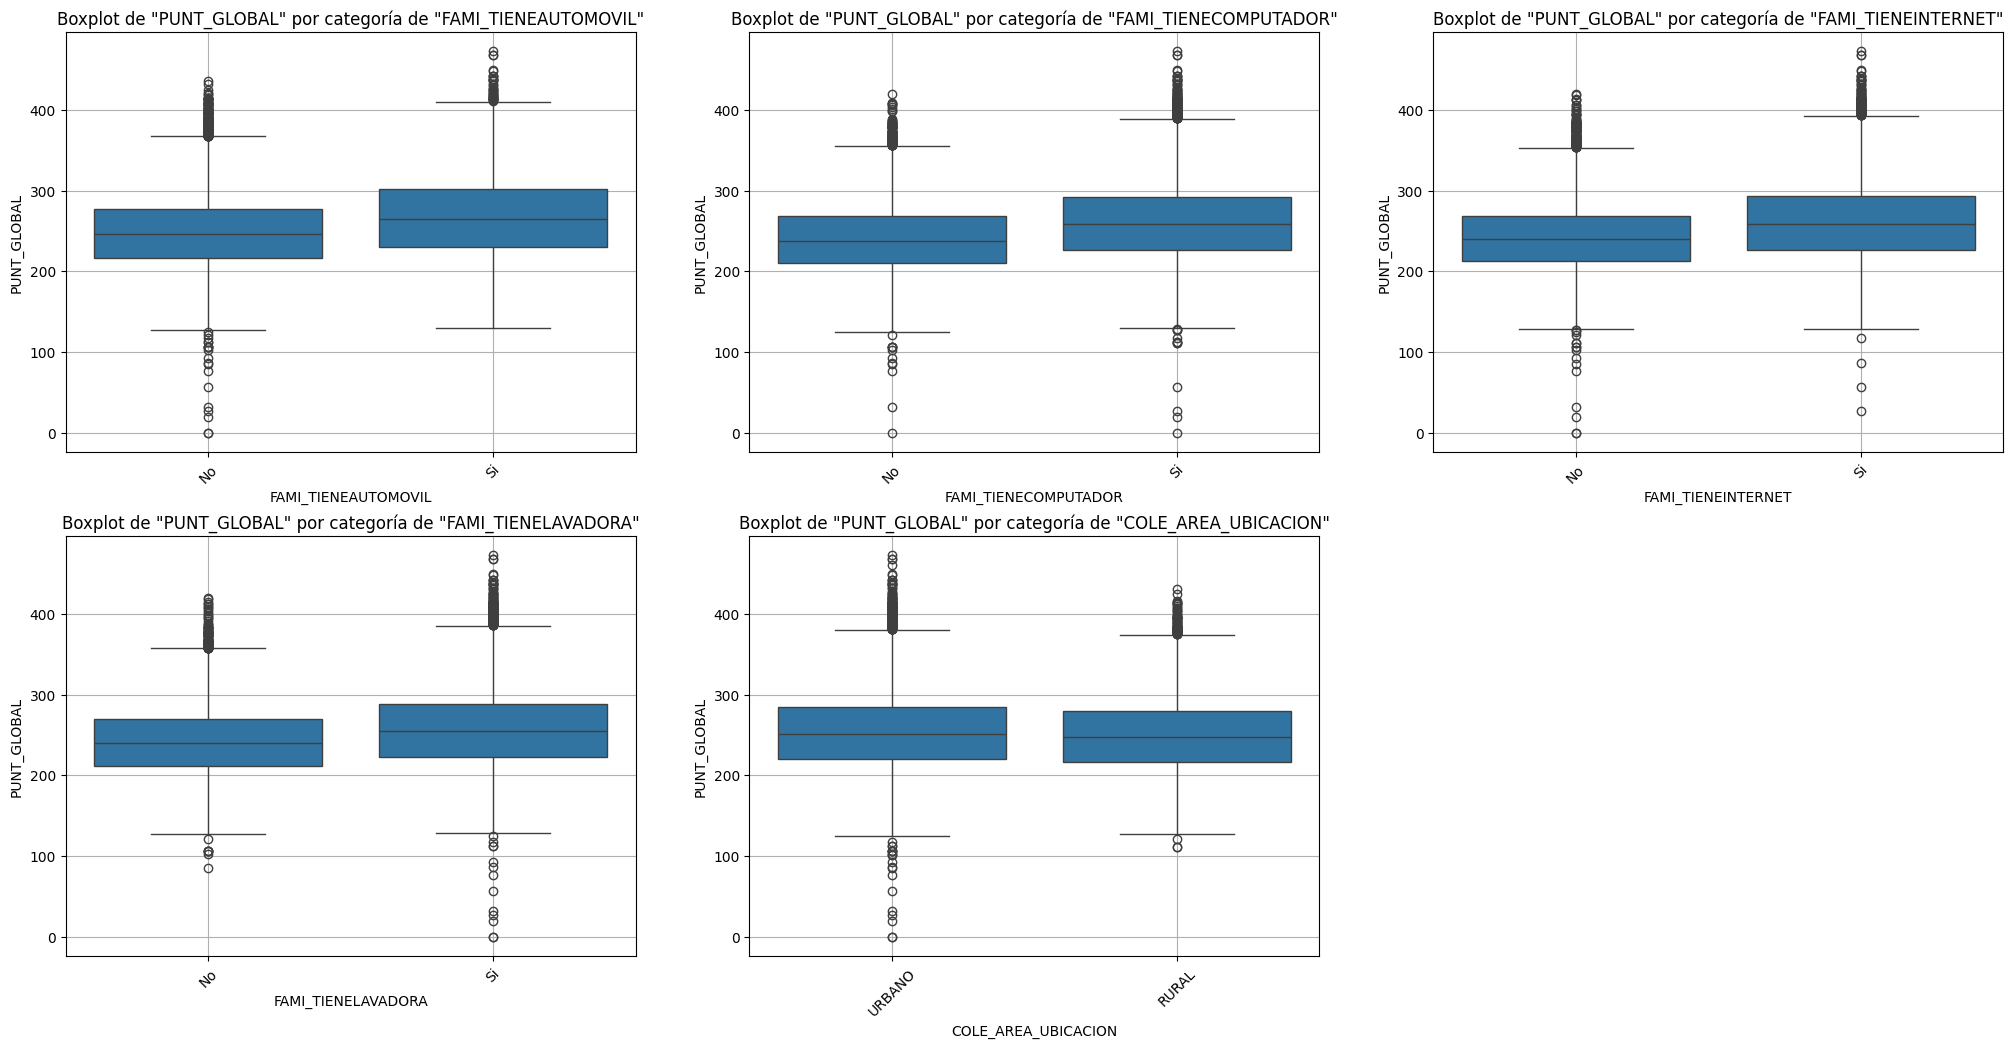

In [62]:
column_names = ['FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'COLE_AREA_UBICACION']
y_feature = 'PUNT_GLOBAL'

# BOX PLOT
plt.figure(figsize=(25, 12))
for i, col in enumerate(column_names, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=col, y=y_feature, data=data_df)
    plt.title(f'Boxplot de "{y_feature}" por categoría de "{col}"')
    plt.xlabel(col)
    plt.ylabel(y_feature)
    plt.xticks(rotation=45)
    plt.grid(True)

In [63]:
column_names = ['FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'COLE_AREA_UBICACION']

for col in column_names:
    mean_punt_global = data_df.groupby(col)['PUNT_GLOBAL'].mean()
    mean_diff = abs(1-(mean_punt_global.max() / mean_punt_global.min())) * 100
    print(f'Variable categórica: {col}')
    print(mean_punt_global)
    print(f'Diferencia porcentual entre los promedios: {mean_diff:.2f}%')
    print('\n')

Variable categórica: FAMI_TIENEAUTOMOVIL
FAMI_TIENEAUTOMOVIL
No    248.329804
Si    266.526496
Name: PUNT_GLOBAL, dtype: float64
Diferencia porcentual entre los promedios: 7.33%


Variable categórica: FAMI_TIENECOMPUTADOR
FAMI_TIENECOMPUTADOR
No    240.699305
Si    260.910035
Name: PUNT_GLOBAL, dtype: float64
Diferencia porcentual entre los promedios: 8.40%


Variable categórica: FAMI_TIENEINTERNET
FAMI_TIENEINTERNET
No    242.050679
Si    261.126497
Name: PUNT_GLOBAL, dtype: float64
Diferencia porcentual entre los promedios: 7.88%


Variable categórica: FAMI_TIENELAVADORA
FAMI_TIENELAVADORA
No    241.759132
Si    257.115145
Name: PUNT_GLOBAL, dtype: float64
Diferencia porcentual entre los promedios: 6.35%


Variable categórica: COLE_AREA_UBICACION
COLE_AREA_UBICACION
RURAL     250.075667
URBANO    253.544092
Name: PUNT_GLOBAL, dtype: float64
Diferencia porcentual entre los promedios: 1.39%




In [34]:
#Calculo de media para cada PERIODO y la diferencia porcentual con media general
mean_punt_global = data_df.groupby('PERIODO')['PUNT_GLOBAL'].mean()
periodos = data_df['PERIODO'].unique()
print(f'Media de PUNT_GLOBAL: {mean_punt_global}')
for periodo in periodos:
    mean_diff = abs(1-(mean_punt_global[periodo] / mean_punt_global)) * 100
    print(f'PERIODO: {periodo}')
    print(f'Diferencia porcentual con la media general: {mean_diff}%')
    print('\n')


Media de PUNT_GLOBAL: PERIODO
20101           NaN
20102           NaN
20111           NaN
20112           NaN
20121           NaN
20122           NaN
20131           NaN
20132           NaN
20141           NaN
20142    252.526066
20151    226.634188
20152    253.859918
20162    262.091010
20172    257.544693
20181    221.481752
20194    248.032317
20201    213.658915
20211    224.857143
20221    221.274510
20224    252.882884
Name: PUNT_GLOBAL, dtype: float64
PERIODO: 20112
Diferencia porcentual con la media general: PERIODO
20101   NaN
20102   NaN
20111   NaN
20112   NaN
20121   NaN
20122   NaN
20131   NaN
20132   NaN
20141   NaN
20142   NaN
20151   NaN
20152   NaN
20162   NaN
20172   NaN
20181   NaN
20194   NaN
20201   NaN
20211   NaN
20221   NaN
20224   NaN
Name: PUNT_GLOBAL, dtype: float64%


PERIODO: 20142
Diferencia porcentual con la media general: PERIODO
20101          NaN
20102          NaN
20111          NaN
20112          NaN
20121          NaN
20122          NaN
20131      

### 3.3 Datos atipicos

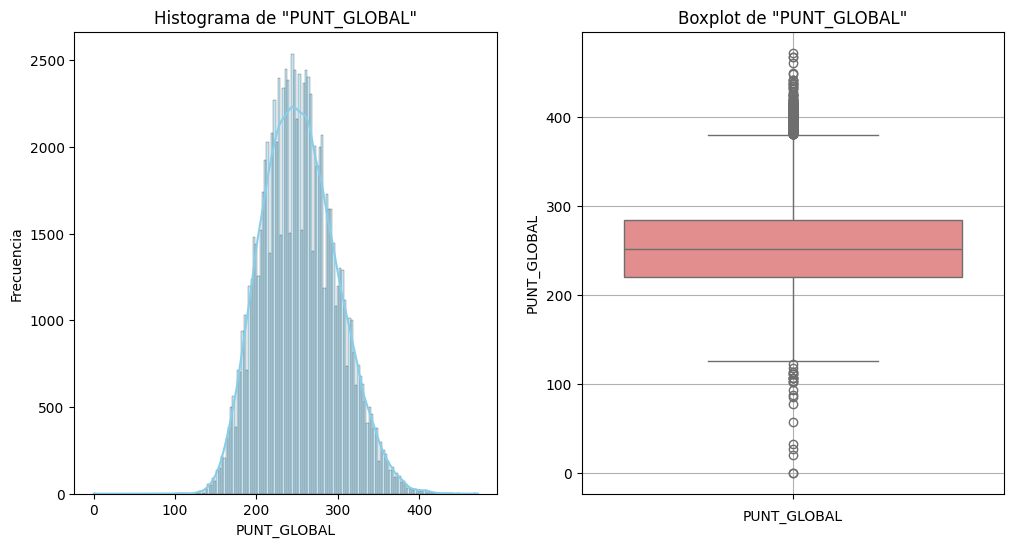

In [64]:
#Histograma y boxplot de la variable 'PUNT_GLOBAL'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_df['PUNT_GLOBAL'], kde=True, color='skyblue')
plt.title('Histograma de "PUNT_GLOBAL"')
plt.xlabel('PUNT_GLOBAL')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(data_df['PUNT_GLOBAL'], color='lightcoral')
plt.title('Boxplot de "PUNT_GLOBAL"')
plt.xlabel('PUNT_GLOBAL')
plt.grid(True)


In [65]:
#Quantile 1 y 3
q1 = data_df['PUNT_GLOBAL'].quantile(0.25)
q3 = data_df['PUNT_GLOBAL'].quantile(0.75)

#Rango intercuartílico
iqr = q3 - q1

#Límites inferior y superior
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#Filtrar los datos
outliers_count = ((data_df['PUNT_GLOBAL'] >= lower_bound) | (data_df['PUNT_GLOBAL'] <= upper_bound)).sum()

#Calcular el porcentaje de datos atípicos
percentage_removed = outliers_count / len(data_df['PUNT_GLOBAL']) * 100

#Imprimir el porcentaje de datos eliminados
print(f'Porcentaje de datos atípicos: {percentage_removed:.2f}%')

Porcentaje de datos atípicos: 65.92%


### 3.4 Búsqueda de relaciones entre las variables de entrada


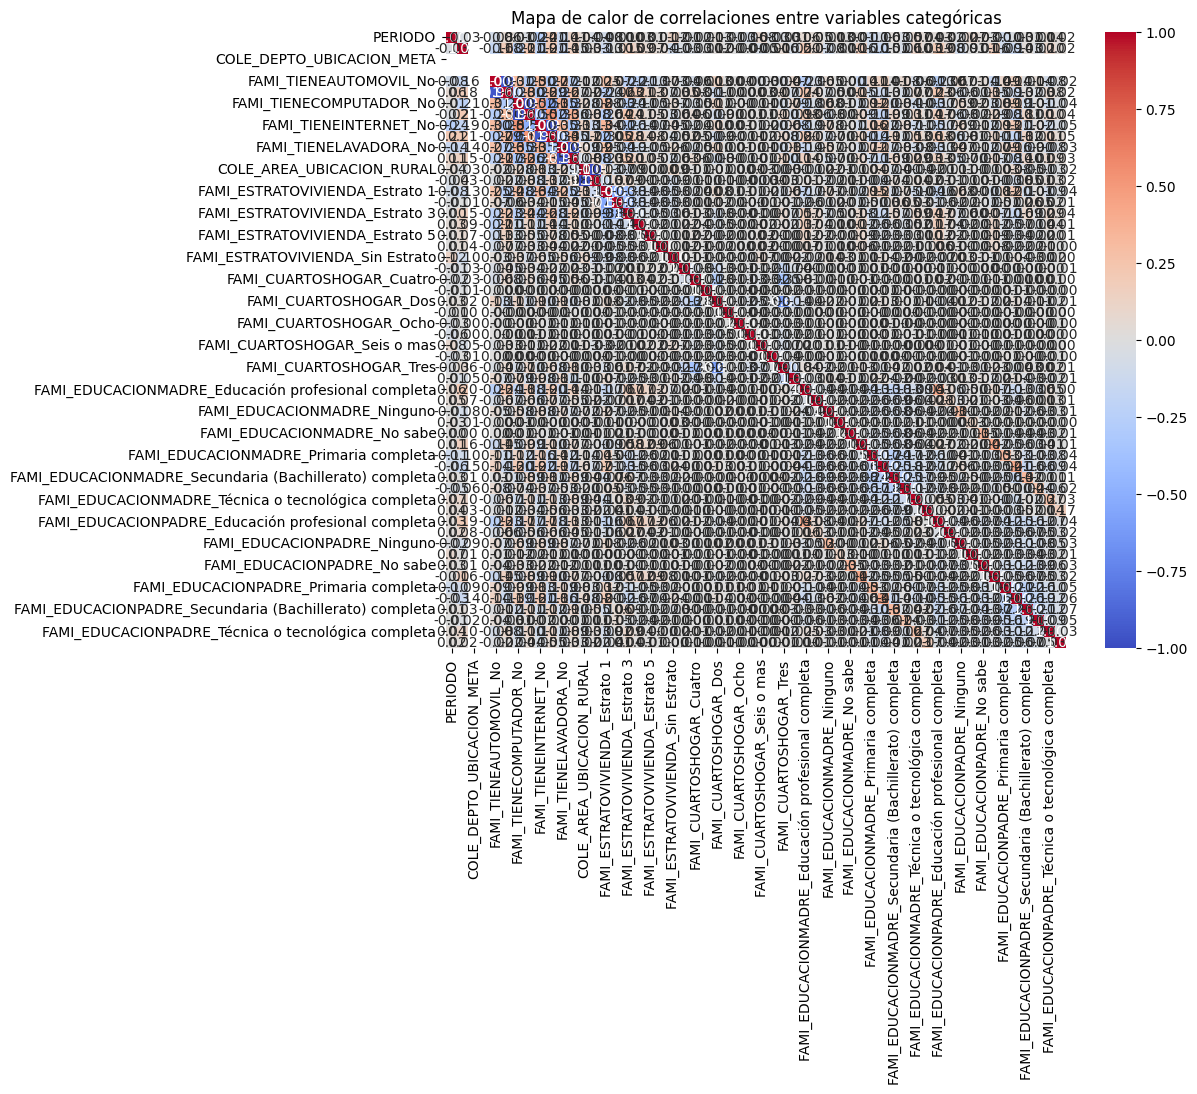

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Codificación one-hot de las variables categóricas
data_encoded = pd.get_dummies(data_df)

# Calcular la matriz de correlación
correlation_matrix = data_encoded.corr()

# Crear el mapa de calor de las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones entre variables categóricas')
plt.show()

